<a href="https://colab.research.google.com/github/aweeeaja/JST-Neural-Network-/blob/main/Single_Layer_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Dataset Description**






Name     : nama penumpang


Survived : Label yang menandakan penumpang selamat atau tidak


Pclass   : kelas tiket penumpang


Sex      : jenis kelamin penumpang


Age      : usia penumpang


SibSp    : jumlah saudara/pasangan penumpang yang berada di kapal


Parch    : jumlah orang tua/anak penumpang yang berada di kapal


Ticket   : nomor ticket penumpang


Fare     : tarif penumpang membeli tiket


Cabin    : nomor kabin penumpang


Embarked : pelabuhan keberangkatan penumpang


PasseggerId : ID penumpang

# **Data Cleaning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

## **Data Train**

In [ ]:
# Membaca data train
df = pd.read_csv('train_data_cl_v2.csv')
df_train = df
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# deskripsi data train
df_train.shape
df_train.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
707          886         0       3   
708          887         0       2   
709          888         1       1   
710          890         1       1   
711          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [ ]:
# info data train
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [ ]:
# cek apakah ada missing value data train
df_train.isnull().values.any()

True

In [ ]:
# Cek banyaknya Missing value data train
df_train.isnull().sum().sum()

529

In [ ]:
# Melihat berapa banyak missing value dari semua atribut dari data train
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         0
dtype: int64

In [ ]:
# Mengisi missing value NaN pada kolom tertentu dengan data random
columns_to_fill = ['Cabin']  # Kolom yang ingin diisi missing value dengan data random

for col in columns_to_fill:
    mask = df_train[col].isnull()  # Membuat mask untuk mendeteksi missing value NaN
    random_values = np.random.choice(df_train.loc[~mask, col], mask.sum())  # Memilih data random dari kolom yang tidak null
    df_train.loc[mask, col] = random_values  # Mengisi missing value dengan data random

print("DataFrame asli:")
print(df)

print("\nDataFrame setelah mengisi missing value NaN pada kolom tertentu dengan data random:")
print(df_train)

DataFrame asli:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
707          886         0       3   
708          887         0       2   
709          888         1       1   
710          890         1       1   
711          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ..

In [ ]:
# cek lagi missing value atribut Cabin
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Mengubah tipe data atribut Sex dan atribut Embarked menjaditipe data  boolean

# Kolom yang ingin diubah tipe datanya
columns_to_convert = ['Sex', 'Embarked']

# Menggunakan LabelEncoder untuk mengubah 'Sex' dan 'Embarked' menjadi tipe data boolean
le = LabelEncoder()

for col in columns_to_convert:
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])

# Menampilkan DataFrame setelah transformasi
print(df_train.head(25))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             7         0       1   
6             8         0       3   
7             9         1       3   
8            10         1       2   
9            11         1       3   
10           12         1       1   
11           13         0       3   
12           14         0       3   
13           15         0       3   
14           16         1       2   
15           17         0       3   
16           19         0       3   
17           21         0       2   
18           22         1       2   
19           23         1       3   
20           24         1       1   
21           25         0       3   
22           26         1       3   
23           28         0       1   
24           31         0       1   

                                     

##**Data Test**

In [ ]:
# Membaca data test
df0 = pd.read_csv('test_data_cl_v2.csv')
df_test= (df0)
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
# deskripsi data test
df_test.shape
df_test.describe

<bound method NDFrame.describe of      PassengerId  Pclass                                             Name  \
0            892       3                                 Kelly, Mr. James   
1            893       3                 Wilkes, Mrs. James (Ellen Needs)   
2            894       2                        Myles, Mr. Thomas Francis   
3            895       3                                 Wirz, Mr. Albert   
4            896       3     Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                              ...   
326         1301       3                        Peacock, Miss. Treasteall   
327         1303       1  Minahan, Mrs. William Edward (Lillian E Thorpe)   
328         1304       3                   Henriksson, Miss. Jenny Lovisa   
329         1306       1                     Oliva y Ocana, Dona. Fermina   
330         1307       3                     Saether, Mr. Simon Sivertsen   

        Sex   Age  SibSp  Parch          

In [ ]:
# info data train
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  331 non-null    int64  
 1   Pclass       331 non-null    int64  
 2   Name         331 non-null    object 
 3   Sex          331 non-null    object 
 4   Age          331 non-null    float64
 5   SibSp        331 non-null    int64  
 6   Parch        331 non-null    int64  
 7   Ticket       331 non-null    object 
 8   Fare         331 non-null    float64
 9   Cabin        87 non-null     object 
 10  Embarked     331 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 28.6+ KB


In [ ]:
# cek apakah ada missing value data test
df_test.isnull().values.any()

True

In [ ]:
# Cek banyaknya Missing value data test
df_test.isnull().sum().sum()

244

In [ ]:
# Melihat berapa banyak missing value dari semua atribut dari data train
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          244
Embarked         0
dtype: int64

In [ ]:
# Mengisi missing value NaN pada kolom tertentu dengan data random
columns_to_fill = ['Cabin']  # Kolom yang ingin diisi missing value dengan data random

for col in columns_to_fill:
    mask = df_test[col].isnull()  # Membuat mask untuk mendeteksi missing value NaN
    random_values = np.random.choice(df_test.loc[~mask, col], mask.sum())  # Memilih data random dari kolom yang tidak null
    df_test.loc[mask, col] = random_values  # Mengisi missing value dengan data random

print("DataFrame asli:")
print(df)

print("\nDataFrame setelah mengisi missing value NaN pada kolom tertentu dengan data random:")
print(df_test)

DataFrame asli:
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
707          886         0       3   
708          887         0       2   
709          888         1       1   
710          890         1       1   
711          891         0       3   

                                                  Name  Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1   
2                               Heikkinen, Miss. Laina    0  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1   
4                             Allen, Mr. William Henry    1  35.0      0   
..                                                 ...  ...   ...    ..

In [ ]:
# cek lagi missing value atribut cabin
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# Mengubah tipe data atribut Sex dan atribut Embarked menjaditipe data  boolean

# Kolom yang ingin diubah tipe datanya
columns_to_convert = ['Sex', 'Embarked']

# Menggunakan LabelEncoder untuk mengubah 'Sex' dan 'Embarked' menjadi tipe data boolean
le = LabelEncoder()

for col in columns_to_convert:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])

# Menampilkan DataFrame setelah transformasi
print(df_test.head(25))

    PassengerId  Pclass                                               Name  \
0           892       3                                   Kelly, Mr. James   
1           893       3                   Wilkes, Mrs. James (Ellen Needs)   
2           894       2                          Myles, Mr. Thomas Francis   
3           895       3                                   Wirz, Mr. Albert   
4           896       3       Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
5           897       3                         Svensson, Mr. Johan Cervin   
6           898       3                               Connolly, Miss. Kate   
7           899       2                       Caldwell, Mr. Albert Francis   
8           900       3          Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
9           901       3                            Davies, Mr. John Samuel   
10          903       1                         Jones, Mr. Charles Cresson   
11          904       1      Snyder, Mrs. John Pillsbury (Nelle 

# **Feature Scalling**

Feature scaling adalah proses normalisasi atau standarisasi fitur-fitur (variabel-variabel) dalam dataset. Tujuan utamanya adalah untuk membawa semua fitur ke skala yang sama atau setidaknya skala yang serupa, tanpa mengubah struktur data.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
# Misalkan kita akan scaling fitur 'Age' dan 'Fare'
fitur_scaling = ['Age', 'Fare']

# Melakukan fitur scaling pada data train
scaler = StandardScaler()
train_fitur_scaled = scaler.fit_transform(df_train[fitur_scaling])

# Terapkan skala yang sama ke data test
test_fitur_scaled = scaler.fit_transform(df_test[fitur_scaling])

# Konversi hasil scaling ke DataFrame (hanya untuk keperluan demonstrasi)
train_fitur_scaled_df = pd.DataFrame(train_fitur_scaled, columns=fitur_scaling)
test_fitur_scaled_df = pd.DataFrame(test_fitur_scaled, columns=fitur_scaling)

# Menampilkan hasil scaling
print("Hasil Scaling pada Data Train:")
print(train_fitur_scaled_df.head())

print("\nHasil Scaling pada Data Test:")
print(test_fitur_scaled_df.head())


Hasil Scaling pada Data Train:
        Age      Fare
0 -0.527669 -0.516380
1  0.577094  0.694046
2 -0.251478 -0.503620
3  0.369951  0.350326
4  0.369951 -0.501257

Hasil Scaling pada Data Test:
        Age      Fare
0  0.306657 -0.542281
1  1.194236 -0.555844
2  2.259331 -0.511885
3 -0.225890 -0.528651
4 -0.580922 -0.469357


In [ ]:
print(train_fitur_scaled_df)

          Age      Fare
0   -0.527669 -0.516380
1    0.577094  0.694046
2   -0.251478 -0.503620
3    0.369951  0.350326
4    0.369951 -0.501257
..        ...       ...
707  0.646142 -0.102875
708 -0.182430 -0.407687
709 -0.734812 -0.086335
710 -0.251478 -0.086335
711  0.162808 -0.506928

[712 rows x 2 columns]


In [ ]:
print(test_fitur_scaled_df)

          Age      Fare
0    0.306657 -0.542281
1    1.194236 -0.555844
2    2.259331 -0.511885
3   -0.225890 -0.528651
4   -0.580922 -0.469357
..        ...       ...
326 -1.930042 -0.445026
327  0.484173  0.801785
328 -0.154884 -0.543168
329  0.626186  1.110932
330  0.590683 -0.551755

[331 rows x 2 columns]


# **Feature Importance**

Feature Importace Merupakan teknik yang digunakan untuk menilai atau mengukur pentingnya setiap fitur (atribut) dalam pembuatan prediksi oleh suatu model.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

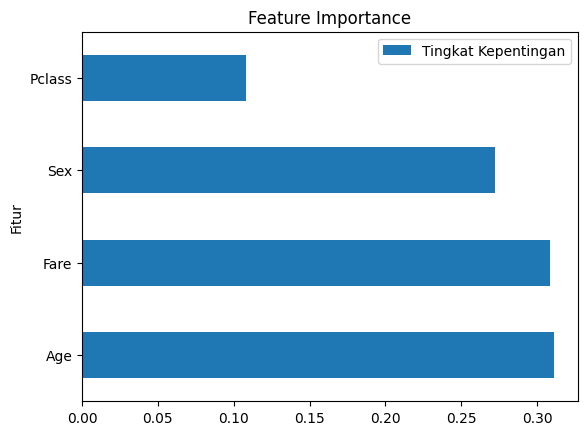

    Fitur  Tingkat Kepentingan
1     Age             0.311372
3    Fare             0.308500
0     Sex             0.271906
2  Pclass             0.108221


In [ ]:
# Memilih atribut tertentu sebagai fitur
fitur_tertentu = ['Sex', 'Age','Pclass','Fare']
X = df_train[fitur_tertentu]  # Memilih hanya atribut yang diinginkan sebagai fitur

# Memilih kolom 'Survived' sebagai label
y = df_train['Survived']

# Inisialisasi model Random Forest dengan seed 42
model = RandomForestClassifier(random_state=42)

# Melatih model dengan data Titanic yang telah dipilih fiturnya
model.fit(X, y)

# Mendapatkan tingkat kepentingan fitur dari model
fitur_importances = model.feature_importances_

# Membuat DataFrame untuk menyimpan tingkat kepentingan fitur beserta nama fitur
fitur_df = pd.DataFrame({'Fitur': X.columns, 'Tingkat Kepentingan': fitur_importances})

# Mengurutkan DataFrame berdasarkan tingkat kepentingan fitur dari yang tertinggi
fitur_df = fitur_df.sort_values(by='Tingkat Kepentingan', ascending=False)

# Menampilkan grafik batang horizontal
fitur_df.plot(kind='barh', x='Fitur', y='Tingkat Kepentingan', title='Feature Importance')
plt.show()

# Menampilkan nama fitur yang dianggap penting oleh model
print(fitur_df)


Berdasarkan tingkat kepentingan fitur, fitur 'Age' menjadi tingkat kepentingan nomer 1 karena Usia mempengaruhi kesempatan untuk selamat. Anak-anak dan manula mungkin mendapatkan prioritas dalam evakuasi.

In [ ]:
# Memilih atribut tertentu sebagai fitur
fitur_tertentu = ['Sex', 'Age','Pclass','Fare']
S = df_test[fitur_tertentu]  # Memilih hanya atribut yang diinginkan sebagai fitur

# # Memilih kolom 'Survived' sebagai label
# T = df_test['Survived']

In [ ]:
df = X
df_test = S
df_truth = pd.read_csv('/content/test_data_GroundTruth_cl.csv')

In [ ]:
print(df)

     Sex   Age  Pclass     Fare
0      1  22.0       3   7.2500
1      0  38.0       1  71.2833
2      0  26.0       3   7.9250
3      0  35.0       1  53.1000
4      1  35.0       3   8.0500
..   ...   ...     ...      ...
707    0  39.0       3  29.1250
708    1  27.0       2  13.0000
709    0  19.0       1  30.0000
710    1  26.0       1  30.0000
711    1  32.0       3   7.7500

[712 rows x 4 columns]


In [ ]:
print(df_test)

     Sex   Age  Pclass      Fare
0      1  34.5       3    7.8292
1      0  47.0       3    7.0000
2      1  62.0       2    9.6875
3      1  27.0       3    8.6625
4      0  22.0       3   12.2875
..   ...   ...     ...       ...
326    0   3.0       3   13.7750
327    0  37.0       1   90.0000
328    0  28.0       3    7.7750
329    0  39.0       1  108.9000
330    1  38.5       3    7.2500

[331 rows x 4 columns]


In [ ]:
import pandas as pd
import numpy as np

def sign(x):
    return np.sign(x)

def step(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def train_single_layer_perceptron(X, y, learning_rate, epochs):
    np.random.seed(42)
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()
    accuracy_history = []

    for epoch in range(epochs):
        predictions = step(np.dot(X, weights) + bias)

        #hitung error
        error = y - predictions

        #Update bobot
        weights += learning_rate * np.dot(X.T, error)
        bias += learning_rate* np.sum(error)

        #Hitung akurasi
        accuracy = evaluate_accuracy(predictions, y)
        accuracy_history.append(accuracy)
        # # # Hitung akurasi pada setiap epoch
        # # accuracy1 = np.mean((predictions >= 0.5) == y_train)
        # print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}')

    return weights, bias, accuracy_history

def predict(X, weights, bias, activation_function):
    return activation_function(np.dot(X, weights) + bias)

def evaluate_accuracy(predictions, truth):
    correct_predictions = np.sum(predictions == truth)
    total_predictions = len(truth)
    accuracy = correct_predictions / total_predictions
    return accuracy

#**Learning rate dengan Step**


#Learning rate : 0.01

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.01
epochs = 10000
weights, bias, accuracy_history1 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy Final: {accuracy * 100:.2f}%")



Accuracy Final: 85.20%


#Learning rate : 0.02

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.02
epochs = 10000
weights, bias, accuracy_history2 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy final: {accuracy * 100:.2f}%")



Accuracy final: 67.37%


#Learning rate : 0.03

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.03
epochs = 10000
weights, bias, accuracy_history3 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.62%


#learning rate : 0.04

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.04
epochs = 10000
weights, bias, accuracy_history4 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.92%


#learning rate : 0.05

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.05
epochs = 10000
weights, bias, accuracy_history5 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 88.22%


#learning rate : 0.06

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.06
epochs = 10000
weights, bias, accuracy_history6 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 67.37%


#learning rate : 0.07

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.07
epochs = 10000
weights, bias, accuracy_history7 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 67.37%


#learning rate : 0.08

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.08
epochs = 10000
weights, bias, accuracy_history8 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 75.83%


#learning rate : 0.09

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.09
epochs = 10000
weights, bias, accuracy_history9 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.92%


#learning rate : 0.1

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.1
epochs = 10000
weights, bias, accuracy_history10 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 86.10%


#**Learning Rate dengan Sign**

#Learning Rate : 0.01

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.01
epochs = 10000
weights, bias, accuracy_history11 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 24.47%


#learning rate : 0.02

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.02
epochs = 10000
weights, bias, accuracy_history12 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 5.74%


#learning rate : 0.03

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.03
epochs = 10000
weights, bias, accuracy_history13 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 15.71%


#learning rate : 0.04

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.04
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 16.92%


#learning rate : 0.05

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.05
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 38.37%


#learning rate : 0.06

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.06
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 5.74%


#learning rate : 0.07

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.07
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 5.74%


#learning rate : 0.08

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.08
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 16.92%


#learning rate : 0.09

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.09
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 16.92%


#learning rate : 0.1

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.1
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sign)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 38.37%


#**Learning rate dengan Sigmoid**


#Learning rate : 0.01

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.01
epochs = 10000
weights, bias, accuracy_history1 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy Final: {accuracy * 100:.2f}%")



Accuracy Final: 82.48%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#Learning rate : 0.02

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.02
epochs = 10000
weights, bias, accuracy_history2 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy final: {accuracy * 100:.2f}%")



Accuracy final: 66.77%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#Learning rate : 0.03

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.03
epochs = 10000
weights, bias, accuracy_history3 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias,sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.62%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.04

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.04
epochs = 10000
weights, bias, accuracy_history4 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.62%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.05

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.05
epochs = 10000
weights, bias, accuracy_history5 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.92%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.06

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.06
epochs = 10000
weights, bias, accuracy_history6 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 67.07%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.07

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.07
epochs = 10000
weights, bias, accuracy_history7 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 67.07%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.08

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.08
epochs = 10000
weights, bias, accuracy_history8 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 75.53%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.09

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.09
epochs = 10000
weights, bias, accuracy_history9 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 74.62%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#learning rate : 0.1

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age', 'Fare']]

learning_rate = 0.1
epochs = 10000
weights, bias, accuracy_history10 = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 84.59%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#**Pengaruh kolom**


#menggunakan 1 kolom : pclass

In [ ]:
X_train = df[['Pclass']]
y_train = y

X_test = df_test[['Pclass']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 38.37%


#menggunakan 1 kolom : Sex

In [ ]:
X_train = df[[ 'Sex']]
y_train = y

X_test = df_test[[ 'Sex']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.63%


#menggunakan 1 kolom : Age

In [ ]:
X_train = df[['Age']]
y_train = y

X_test = df_test[[ 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 38.37%


#menggunakan 1 kolom :Fare

In [ ]:
X_train = df[['Fare']]
y_train = y

X_test = df_test[[ 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.93%


#menggunakan 2 kolom :pclass dan sex


In [ ]:
X_train = df[['Pclass', 'Sex']]
y_train = y

X_test = df_test[['Pclass', 'Sex']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 84.89%


#menggunakan 2 kolom : Pclass dan Age

In [ ]:
X_train = df[['Pclass', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 52.57%


#menggunakan 2 kolom: Fare dan pclass

In [ ]:
X_train = df[['Pclass', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 58.61%


#menggunakan 2 kolom : Age dan fare

In [ ]:
X_train = df[[ 'Age', 'Fare']]
y_train = y

X_test = df_test[['Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 63.14%


#menggunakan 2 kolom : Age dan Sex

In [ ]:
X_train = df[[ 'Sex', 'Age']]
y_train = y

X_test = df_test[['Sex', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.61%


#menggunakan 2 kolom : Sex dan fare

In [ ]:
X_train = df[['Sex', 'Fare']]
y_train = y

X_test = df_test[[ 'Sex', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 77.64%


# menggunakan 3 kolom : sex,age,fare

In [ ]:
X_train = df[[ 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[[ 'Sex', 'Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 71.60%


#menggunakan 3 kolom:Age, fare ,pclass

In [ ]:
X_train = df[['Pclass', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.93%


#menggunakan 3 kolom:pclass,fare, sex

In [ ]:
X_train = df[['Pclass', 'Sex', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 92.45%


#menggunakan 3 kolom : pclass,sex,age

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 64.05%


#**Pengaruh kolom dengan sigmoid**


#menggunakan 1 kolom : pclass

In [ ]:
X_train = df[['Pclass']]
y_train = y

X_test = df_test[['Pclass']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 23.26%


#menggunakan 1 kolom : Sex

In [ ]:
X_train = df[[ 'Sex']]
y_train = y

X_test = df_test[[ 'Sex']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 0.00%


#menggunakan 1 kolom : Age

In [ ]:
X_train = df[['Age']]
y_train = y

X_test = df_test[[ 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.24%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 1 kolom :Fare

In [ ]:
X_train = df[['Fare']]
y_train = y

X_test = df_test[[ 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.93%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 2 kolom :pclass dan sex


In [ ]:
X_train = df[['Pclass', 'Sex']]
y_train = y

X_test = df_test[['Pclass', 'Sex']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 23.26%


#menggunakan 2 kolom : Pclass dan Age

In [ ]:
X_train = df[['Pclass', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 51.36%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 2 kolom: Fare dan pclass

In [ ]:
X_train = df[['Pclass', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 58.61%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 2 kolom : Age dan fare

In [ ]:
X_train = df[[ 'Age', 'Fare']]
y_train = y

X_test = df_test[['Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 63.14%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 2 kolom : Age dan Sex

In [ ]:
X_train = df[[ 'Sex', 'Age']]
y_train = y

X_test = df_test[['Sex', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.61%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 2 kolom : Sex dan fare

In [ ]:
X_train = df[['Sex', 'Fare']]
y_train = y

X_test = df_test[[ 'Sex', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 77.64%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


# menggunakan 3 kolom : sex,age,fare

In [ ]:
X_train = df[[ 'Sex', 'Age', 'Fare']]
y_train = y

X_test = df_test[[ 'Sex', 'Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 71.60%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 3 kolom:Age, fare ,pclass

In [ ]:
X_train = df[['Pclass', 'Age', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Age', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.93%


#menggunakan 3 kolom:pclass,fare, sex

In [ ]:
X_train = df[['Pclass', 'Sex', 'Fare']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Fare']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 91.54%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#menggunakan 3 kolom : pclass,sex,age

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.5
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, sigmoid)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 64.05%


<ipython-input-198-ba958b7a01d2>:11: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


#Pengaruh Epoch





#**Epoch : 100 - 1000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 100
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 76.13%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 200
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.63%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 300
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 50.15%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 400
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 77.64%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 500
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 61.63%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 600
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 45.32%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 700
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.24%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 800
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.24%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 900
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.24%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 40.79%


#**epoch:1100-2000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1100
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.54%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1200
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.24%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1300
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 87.92%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1400
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 69.79%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1500
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.54%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1600
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 81.57%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1700
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.54%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1800
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 82.18%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 1900
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 42.90%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 62.54%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2100
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2200
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2300
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2400
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2500
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2600
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2700
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2800
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 2900
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


#**epoch:3000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 3000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 64.35%


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 3100
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")


#**epoch:4000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 4000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 83.69%


#**epoch:5000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 5000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 83.38%


#**epoch:6000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 6000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 100.00%


#**epoch:7000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 7000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 50.76%


#**epoch:8000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 8000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 76.44%


#**epoch :9000**

In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 9000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 80.97%


#**epoch : 10000**


In [ ]:
X_train = df[['Pclass', 'Sex', 'Age']]
y_train = y

X_test = df_test[['Pclass', 'Sex', 'Age']]

learning_rate = 0.4
epochs = 10000
weights, bias, accuracy_history = train_single_layer_perceptron(X_train, y_train, learning_rate, epochs)

predictions = predict(X_test, weights, bias, step)

accuracy = evaluate_accuracy(predictions, df_truth['Survived'])
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 84.59%


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# accuracy_history = [accuracy_history1, accuracy_history2, accuracy_history3, accuracy_history4, accuracy_history5, accuracy_history6, accuracy_history7]

# # Assuming all runs have the same number of epochs
# epochs = len(accuracy_history1)

# # Transpose the accuracy history for plotting
# accuracy_history = list(map(list, zip(*accuracy_history)))

# plt.figure(figsize=(10, 6))

# for i, acc_history in enumerate(accuracy_history):
#     plt.plot(range(1, epochs + 1), acc_history, marker='.', label=f'Run {i+1}')

# plt.title('Accuracy over Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()
